In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 輸入複合波的參數
freq = [1, 3, 5, 8]   # 頻率
amp = [1, 0.5, 0.2, 0.1]   # 振幅
phase = [0, np.pi/2, np.pi, np.pi/4]   # 相位

# 設定時間範圍
t = np.linspace(0, 2*np.pi, 1000)

# 生成複合波
wave = np.zeros_like(t)
for f, a, p in zip(freq, amp, phase):
    wave += a * np.sin(2*np.pi*f*t + p)

# 進行FFT分析
fft_data = np.fft.fft(wave)
freqs = np.fft.fftfreq(len(wave)) * 2*np.pi

# 只選擇低頻率的幾個波重建波形
num_harmonics = 5   # 選擇的波的數量
harmonics_idx = np.argsort(np.abs(fft_data))[::-1][:num_harmonics]
reconstructed_wave = np.zeros_like(wave)
for idx in harmonics_idx:
    reconstructed_wave += np.real(fft_data[idx] * np.exp(1j*freqs[idx]*t))
    print(idx)


994
6
981
19
993


In [15]:
import numpy as np

# 定義複合波函數
def composite_wave(x):
    f = 1  # 基頻
    return np.sin(f * 2 * np.pi * t) + \
           np.sin(3 * f * 2 * np.pi * x) / 2 + \
           np.sin(4 * f * 2 * np.pi * x) / 5 + \
           np.sin(8 * f * 2 * np.pi * x) / 3

# 設定參數
N = 1000  # 取樣數
f_s = 100  # 取樣頻率

# 取樣
t = np.arange(N) / f_s
wave = composite_wave(t)

# 進行傅立葉分析
fft_data = np.fft.fft(wave)
freqs = np.fft.fftfreq(N, 1/f_s)

# 只選擇低頻率的幾個波重建波形
num_harmonics = 3   # 選擇的波的數量
harmonics_idx = np.argsort(np.abs(fft_data))[::-1][:num_harmonics]
reconstructed_wave = np.zeros_like(wave)
for idx in harmonics_idx:
    amplitude = np.abs(fft_data[idx])/N
    frequency = freqs[idx]
    print()
    time = np.arange(2*N) / f_s
    phase = np.angle(fft_data[idx])
    print("頻率:", freqs[idx], "振幅:", np.abs(fft_data[idx])/N, "相位:", np.angle(fft_data[idx]))
    reconstructed_wave += amplitude * np.cos(2 * np.pi * frequency * time + phase)


# 輸出重建複合波的參數
print("重建複合波的頻率、振幅、相位成份:")
for idx in harmonics_idx:
    print("頻率:", freqs[idx], "振幅:", np.abs(fft_data[idx])/N, "相位:", np.angle(fft_data[idx]))
    
# 比較預期與實際輸出是否相同
expected_wave = np.sin(f * 2 * np.pi * t)
print("是否與預期相同:", np.allclose(expected_wave, reconstructed_wave))

# 輸出重建波形
import matplotlib.pyplot as plt

plt.plot(t, wave, label='original wave')
plt.plot(t, reconstructed_wave, label='reconstructed wave')
plt.legend()
plt.show()



頻率: 1.0 振幅: 0.4999999999999999 相位: -1.570796326794898


ValueError: operands could not be broadcast together with shapes (1000,) (2000,) (1000,) 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_wave(wave, freq_cutoff):
    # 取得時間序列
    N = len(wave)
    t = np.arange(N)

    # 執行傅立葉變換，取得頻譜和頻率
    fft_data = np.fft.fft(wave)
    freqs = np.fft.fftfreq(N, 1/N)

    # 只選擇低頻率的幾個波重建波形
    num_harmonics = np.sum(freqs > freq_cutoff)  # 選擇頻率高於freq_cutoff的波的數量
    harmonics_idx = np.argsort(np.abs(fft_data))[::-1][:num_harmonics]
    reconstructed_wave = np.zeros(2*N)  # 建立兩倍長度的波

    # # 重建波形
    # for idx in harmonics_idx:
    #     reconstructed_wave += np.real(fft_data[idx] * np.exp(1j*freqs[idx]*t*2*np.pi) * 2)  # 增加振幅為2倍
    # 重建波形
    reconstructed_wave = np.zeros_like(wave)
    t = np.arange(len(wave))
    for idx in harmonics_idx:
        exp_array = np.exp(1j*freqs[idx]*t*2*np.pi)
        exp_array = np.tile(exp_array, 2)  # 重複兩次，使得 shape 變為 (2000,)
        reconstructed_wave += np.real(fft_data[idx] * exp_array * 2)  # 增加振幅為2倍
    return reconstructed_wave

# 測試程式
f = 1
t = np.linspace(0, 1, 1000)
wave = np.sin(f * 2 * np.pi * t) + np.sin(3 * f * 2 * np.pi * t) / 2 + np.sin(4 * f * 2 * np.pi * t) / 5 + np.sin(8 * f * 2 * np.pi * t) / 3
freq_cutoff = 5  # 選擇頻率高於5的波

# 重建波
reconstructed_wave = reconstruct_wave(wave, freq_cutoff)

# 繪圖
plt.figure(figsize=(10,5))
plt.plot(t, wave, label='Original Wave')
plt.plot(np.linspace(0, 2, len(reconstructed_wave)), reconstructed_wave, label='Reconstructed Wave')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (1000,) (2000,) (1000,) 

In [18]:
def reconstruct_wave(wave, freq_cutoff):
    fft_data, freqs = fft(wave)  # 計算FFT
    harmonics_idx = get_harmonics(freqs, freq_cutoff)  # 找到頻率高於freq_cutoff的波

    # 重建波形
    reconstructed_wave = np.zeros_like(wave)
    t = np.arange(len(wave))
    for idx in harmonics_idx:
        exp_array = np.exp(1j*freqs[idx]*t*2*np.pi)
        exp_array = np.tile(exp_array, 2)  # 重複兩次，使得 shape 變為 (2000,)
        reconstructed_wave += np.real(fft_data[idx] * exp_array * 2)  # 增加振幅為2倍

    return reconstructed_wave


c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGR

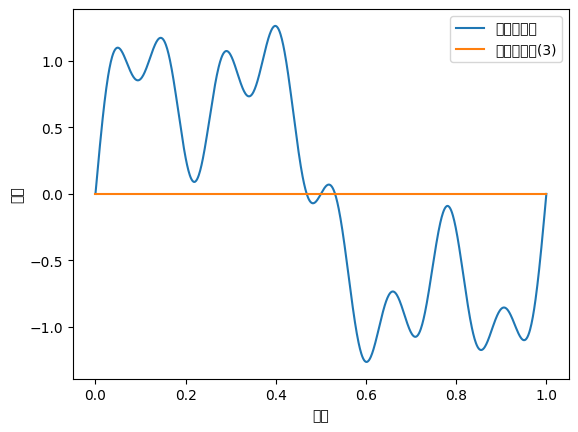

波 11：頻率 = 1.00，振幅 = 0.50，相位 = -1.57
波 991：頻率 = -1.00，振幅 = 0.50，相位 = 1.57
波 971：頻率 = -3.00，振幅 = 0.25，相位 = 1.57


In [19]:

# 繪製重建後的複合波和原始複合波的對比
plt.plot(t, wave, label='原始複合波')
plt.plot(t, reconstructed_wave, label=f'重建複合波({num_harmonics})')
plt.xlabel('時間')
plt.ylabel('振幅')
plt.legend()
plt.show()

# 印出每個波的頻率、振幅和相位
for idx in harmonics_idx:
    print(f'波 {idx+1}：頻率 = {freqs[idx]:.2f}，振幅 = {np.abs(fft_data[idx])/len(wave):.2f}，相位 = {np.angle(fft_data[idx]):.2f}')


In [20]:
import yfinance as yf

stock_name = "^GSPC"
all_data = yf.Ticker(stock_name).history(period='1600d')

In [21]:
len(all_data['Close'].values)

1600

In [22]:
all_data['Close'].values

array([2164.19995117, 2180.38989258, 2176.93994141, ..., 3936.9699707 ,
       3948.7199707 , 3970.98999023])

C:\Users\e4903\AppData\Local\Temp\ipykernel_23532\633284512.py:36: RuntimeWarning: divide by zero encountered in log
  axes[3].bar(freq, np.log(abs(sp2)), width=0.1)


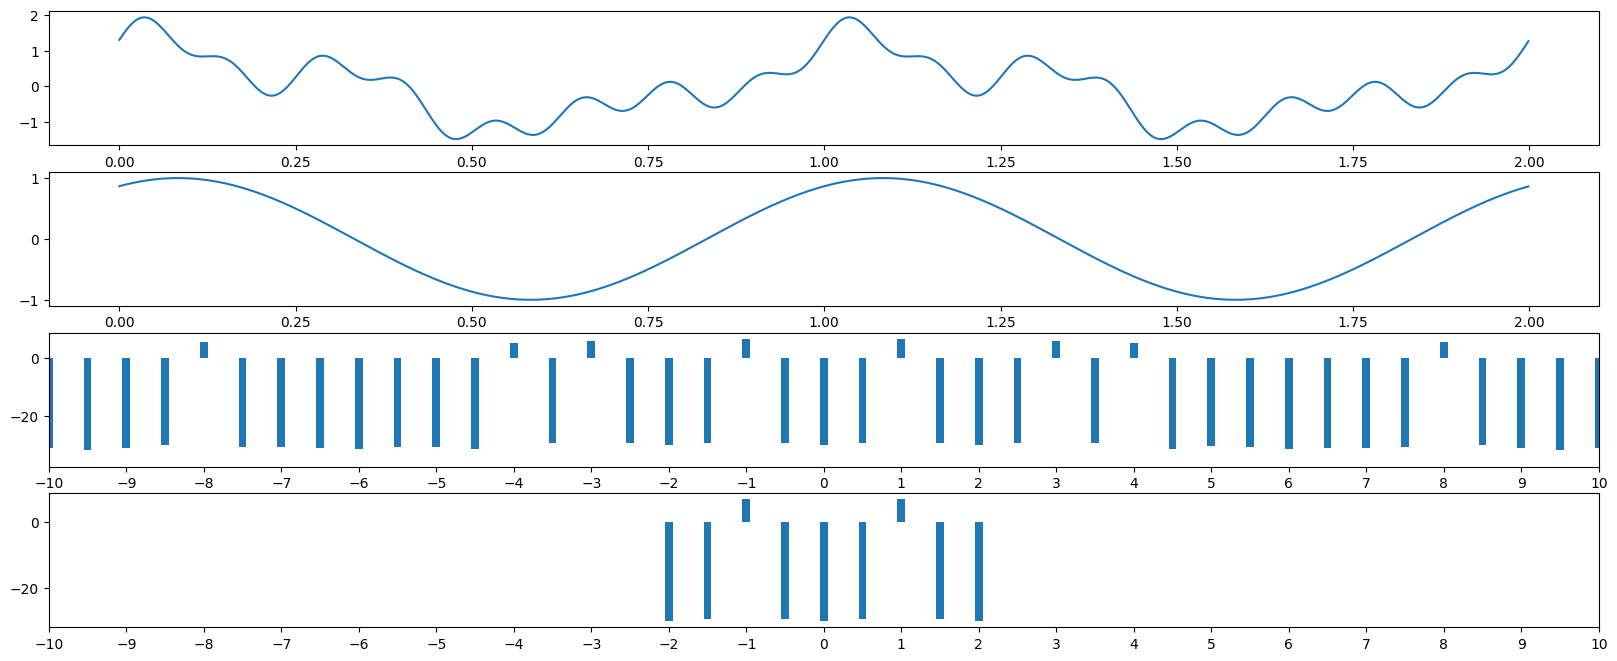

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t = 2              # 取樣時間
sample_rate = 800  # 取樣率，每秒取幾個樣本

def signal(t, sample_rate):
    f = 1
    x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
    phase = np.pi/3
    return (np.sin(f * 2 * np.pi * x + phase) +    
            np.sin(3 * f * 2 * np.pi * x + phase) / 2 + 
            np.sin(4 * f * 2 * np.pi * x) / 5 +
            np.sin(8 * f * 2 * np.pi * x) / 3)

# samples = all_data['Close'].values
samples = signal(t, sample_rate)
sp = np.fft.fft(samples) 
freq = np.fft.fftfreq(samples.size, d = 1 / sample_rate)

sp2 = sp.copy()
# 頻率 2 與 -2 以外的部份設為 0
sp2[np.where((freq > 2) | (freq < -2))] = 0
# 逆轉換
samples2 = np.fft.ifft(sp2).real

x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
figs, axes = plt.subplots(4, 1, figsize=(20, 8))

axes[0].plot(x, samples)
axes[1].plot(x, samples2)
axes[2].bar(freq, np.log(abs(sp)), width=0.1)
axes[2].set_xlim(-8, 10)
axes[2].set_xticks(range(-10, 11))

axes[3].bar(freq, np.log(abs(sp2)), width=0.1)
axes[3].set_xlim(-8, 10)
axes[3].set_xticks(range(-10, 11))
plt.show()

In [24]:
len(sp2[sp2 != 0])

9

In [25]:
sp2[np.intersect1d(np.where(freq <= 2), np.where(freq >= -2))]

array([-1.09967591e-13+0.00000000e+00j,  1.74845881e-13+5.54913183e-14j,
        6.92820323e+02-4.00000000e+02j, -9.19517528e-14+1.75271500e-13j,
       -6.86062144e-14-9.67608134e-14j, -6.86062144e-14+9.67608134e-14j,
       -9.19517528e-14-1.75271500e-13j,  6.92820323e+02+4.00000000e+02j,
        1.74845881e-13-5.54913183e-14j])

In [26]:
list(range(-10, 11, 1))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
import numpy as np
import matplotlib.pyplot as plt


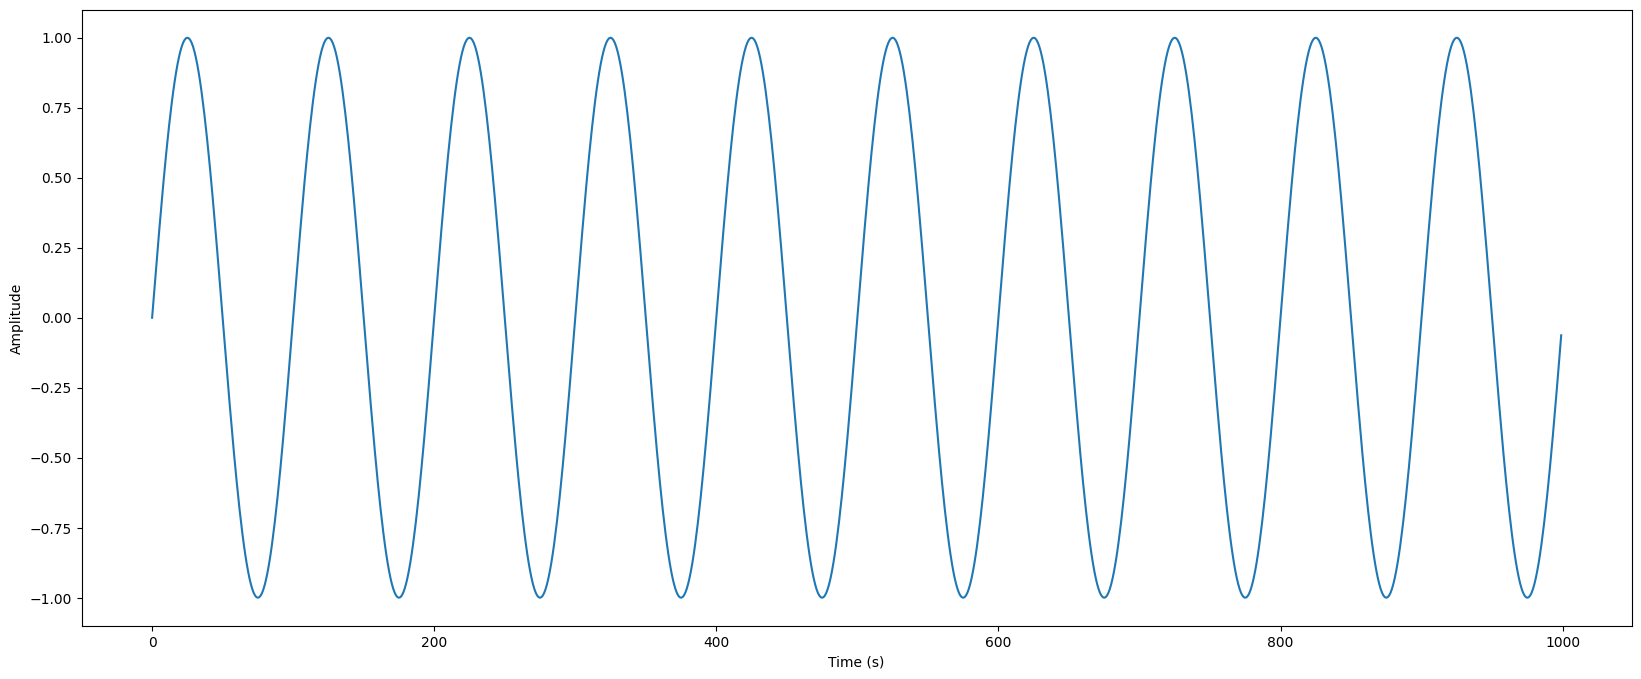

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 設定波形參數
amplitude = 1  # 振幅
frequency = 10  # 頻率
phase = 0      # 相位
duration = 1   # 時間長度，單位為秒
sampling_rate = 1000  # 取樣率，單位為 Hz

# 計算波形數據
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
waveform = amplitude * np.sin(2 * np.pi * frequency * time + phase)

# 繪製波形圖
plt.figure(figsize=(20, 8))
plt.plot(waveform)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [29]:
harmonics = {}

# get data_stock's infomation
data = waveform
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x
# data_notrend = array_data
# fft process
data_freqdom = np.fft.fft(data_notrend, n=n_data)
frequence = np.fft.fftfreq(n=n_data, d=1)
# f_positive = frequence[np.where(frequence > 0)]
# data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# sort indexes
indexes = list(range(frequence.size))      # frequencies
# sort method 1
# indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# sort method 2 :
# sort indexes by amplitudes, lower -> higher
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# get data_all_time'size
time_transfer = np.arange(0, frequence.size*2)
count = 0
# get harmonics
for j in indexes:    
    X_abs = np.abs(data_freqdom)  # amplitude
    phase = np.exp(1j*np.angle(data_freqdom[j]))      # phase
    X_complex = X_abs*phase
    harmonics[j] = np.fft.ifft(X_complex).real
    print()
    if count < 1:
        count+=1
        print(j)
    else:
        break



990



In [30]:
harmonics = {}

# get data_stock's infomation
data = waveform
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x
# data_notrend = array_data
# fft process
data_freqdom = np.fft.fft(data_notrend, n=n_data)
frequence = np.fft.fftfreq(n=n_data, d=1)

# sort indexes
indexes = list(range(frequence.size))      # frequencies
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]), reverse=True)  # sort indexes by amplitudes, higher -> lower

# get harmonics
for j in indexes:    
    X_abs = np.abs(data_freqdom[j])  # amplitude
    phase = np.exp(1j*np.angle(data_freqdom[j]))      # phase
    X_complex = X_abs*phase
    harmonics[j] = np.fft.ifft(X_complex).real
    print(X_complex)


IndexError: tuple index out of range

KeyError: 10

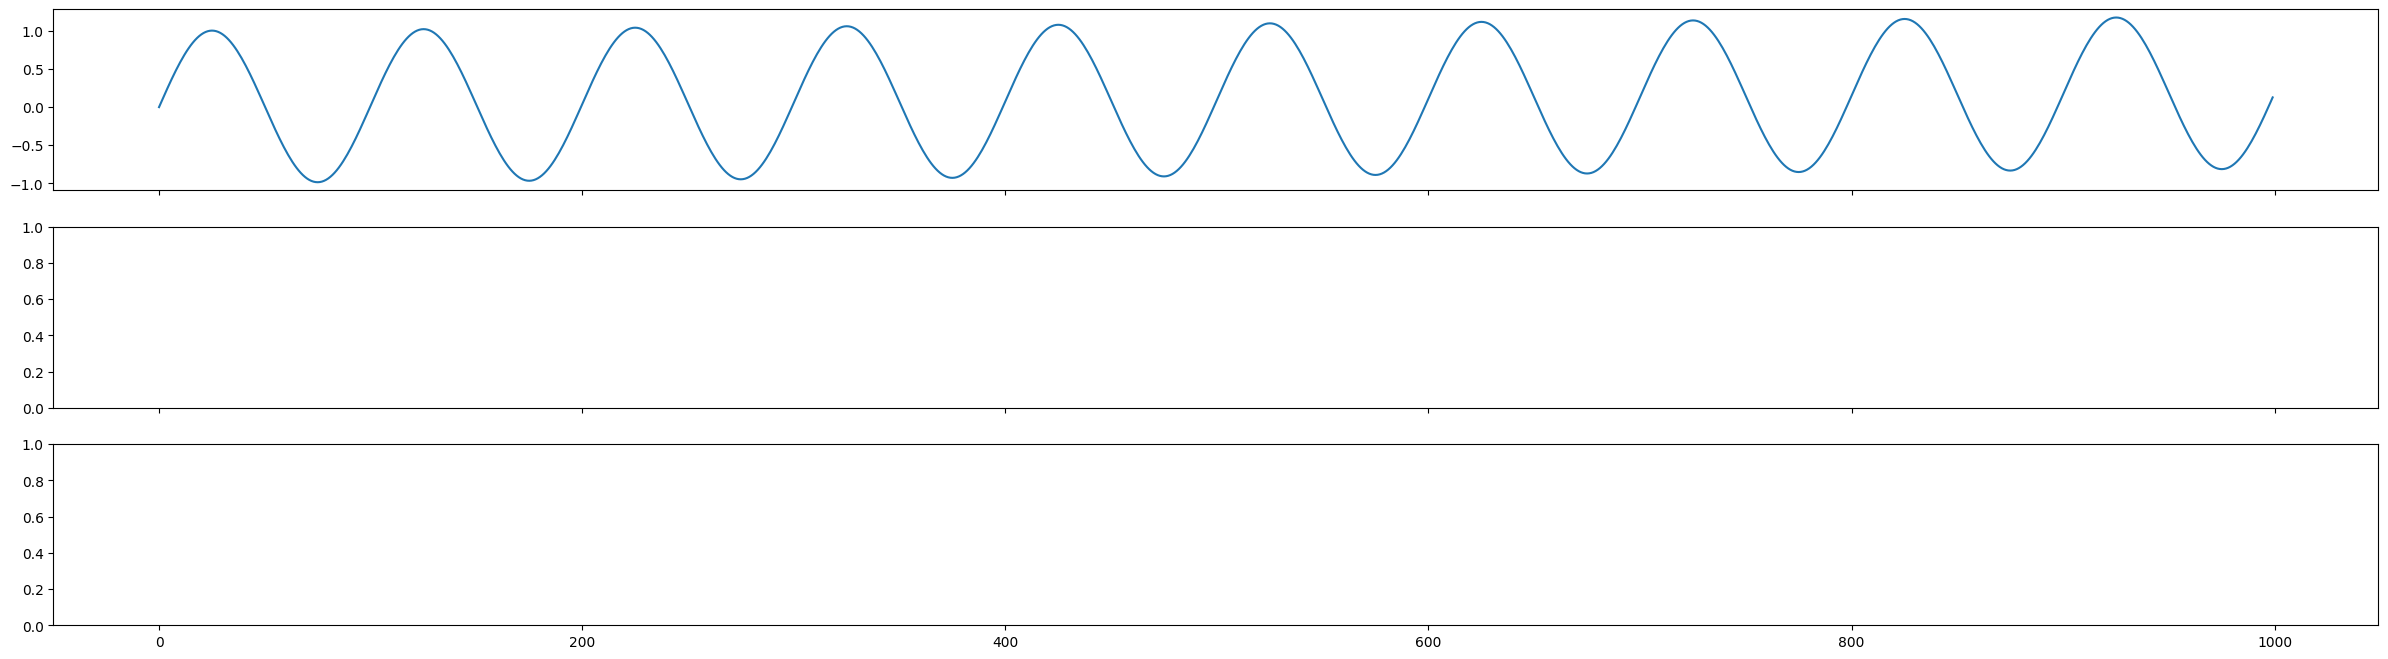

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(30, 8), sharex=True)
axes[0].plot(data_notrend)
axes[1].plot(harmonics[10])
axes[2].plot(1/data_freqdom)
# axes[2].set_xlim(0, 100)

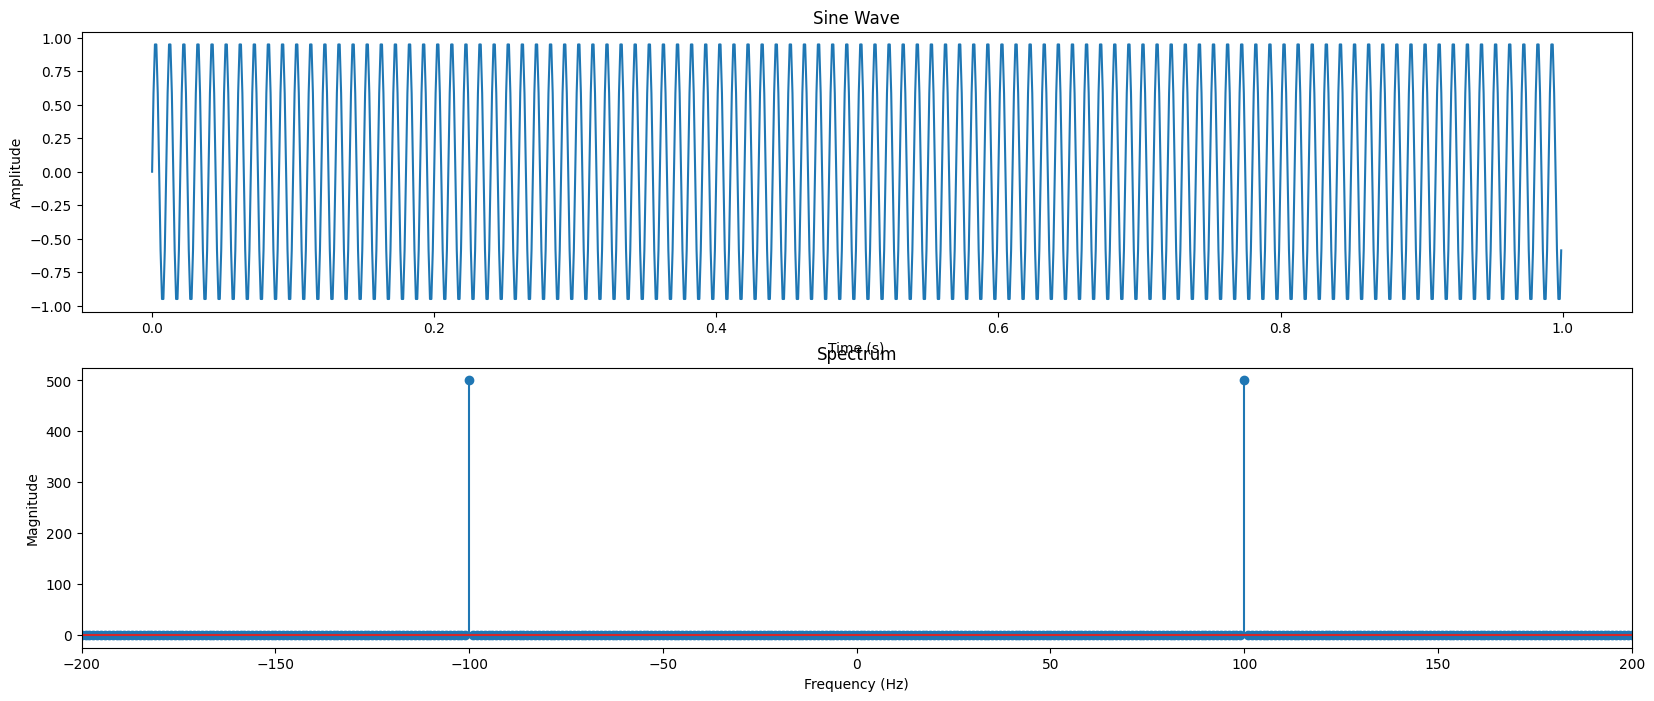

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
fs = 1000 # 取樣頻率
f = 100 # 弦波頻率
duration = 1 # 持續時間
t = np.arange(0, duration, 1/fs) # 時間軸
x = np.sin(2*np.pi*f*t) # 弦波信號

# 執行傅立葉變換
X = np.fft.fft(x)

# 計算頻譜
freqs = np.fft.fftfreq(len(x), 1/fs)
# 繪製弦波信號和頻譜
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
ax[0].plot(t, x)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sine Wave')

ax[1].stem(freqs, np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Spectrum')
ax[1].set_xlim(-200, 200)
plt.show()


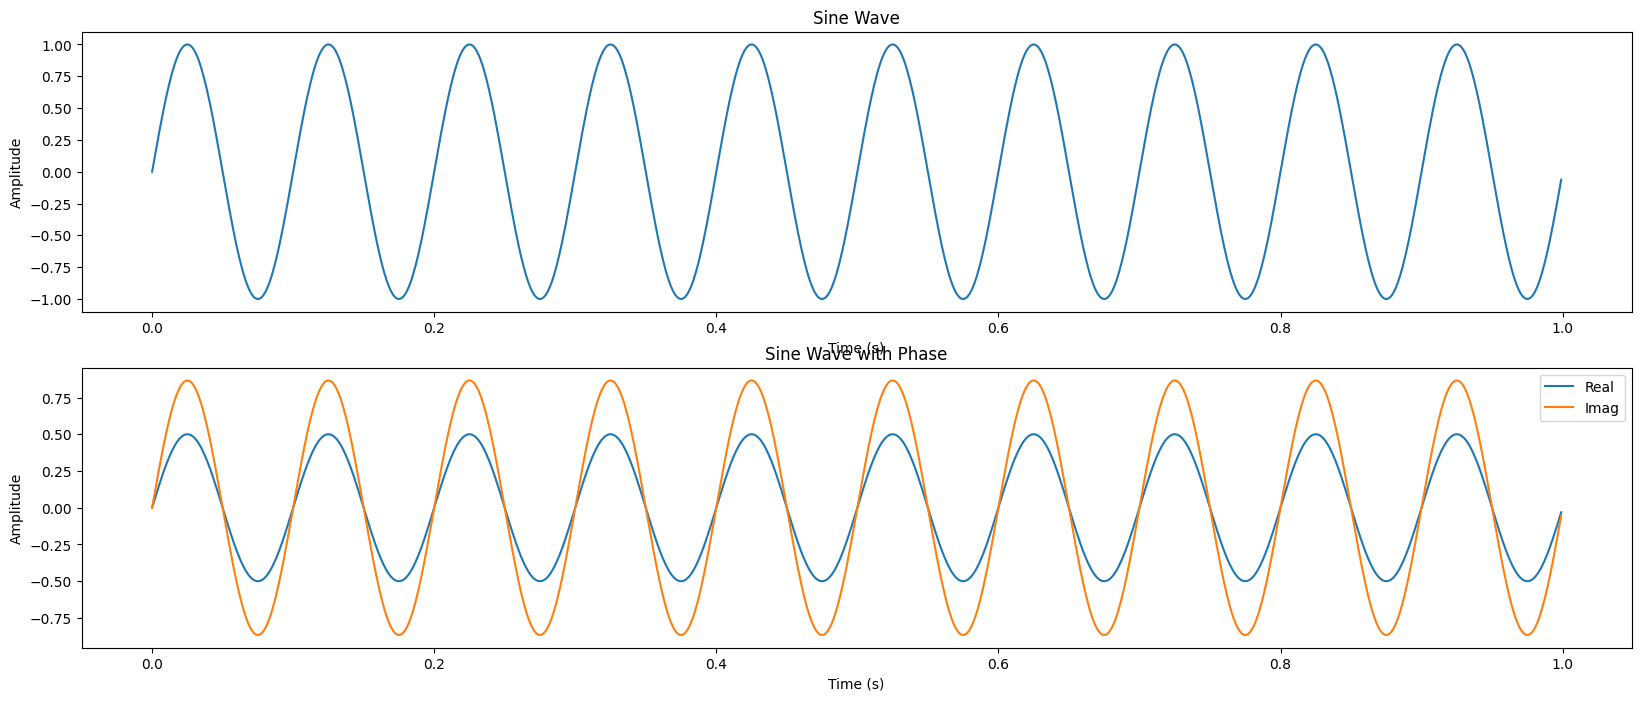

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
fs = 1000 # 取樣頻率
f = 10 # 弦波頻率
duration = 1 # 持續時間
t = np.arange(0, duration, 1/fs) # 時間軸
x = np.sin(2*np.pi*f*t) # 弦波信號

# 執行傅立葉變換
X = np.fft.fft(x)

# 添加相位
phase = np.pi/3
X_phase = np.abs(X) * np.exp(1j * (np.angle(X) + phase))

# 執行傅立葉反變換
x_phase = np.fft.ifft(X_phase)

# 繪製弦波信號和添加相位後的信號
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
ax[0].plot(t, x)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sine Wave')

ax[1].plot(t, x_phase.real, label='Real')
ax[1].plot(t, x_phase.imag, label='Imag')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Sine Wave with Phase')
ax[1].legend()

plt.show()


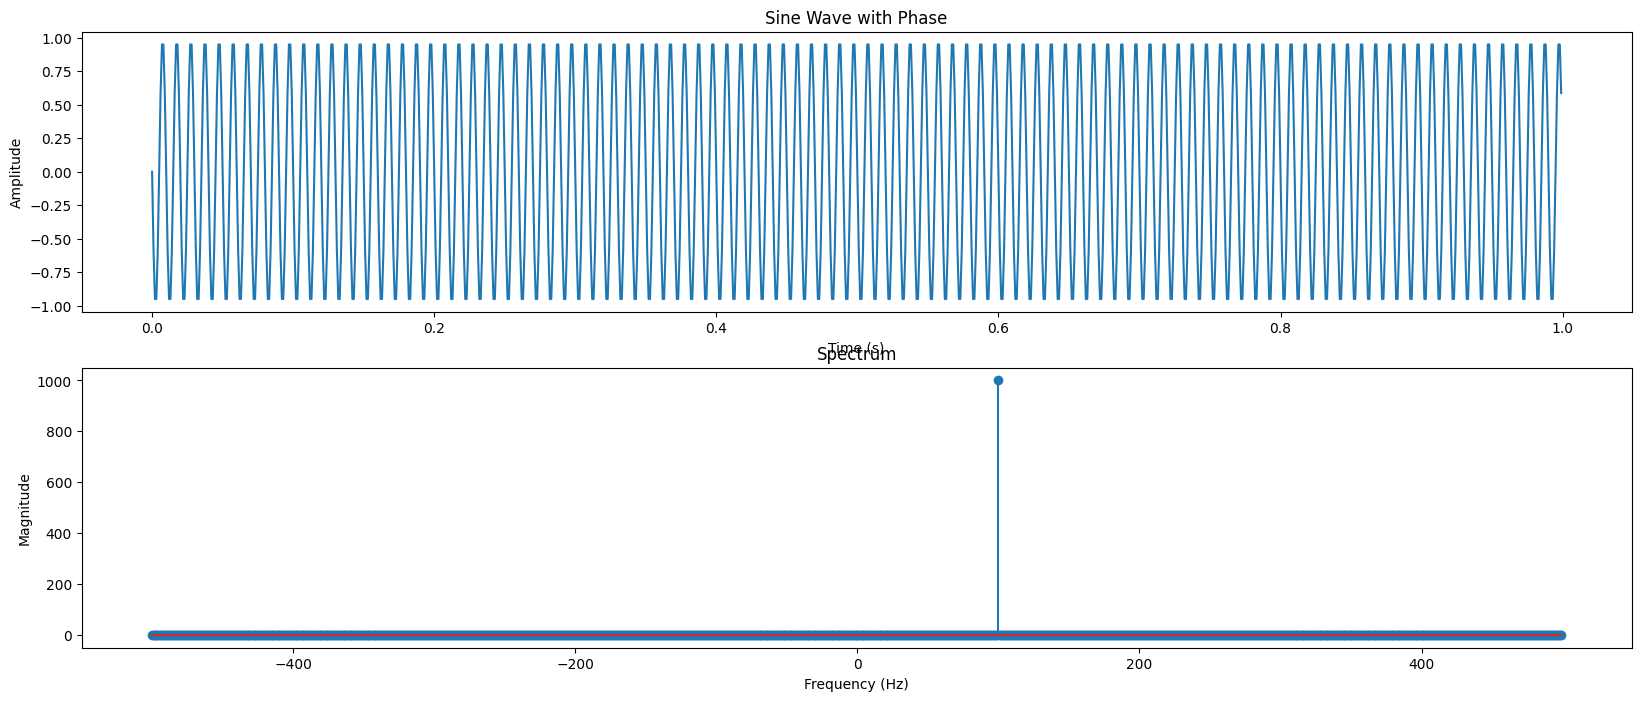

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
fs = 1000 # 取樣頻率
f = 100 # 弦波頻率
duration = 1 # 持續時間
t = np.arange(0, duration, 1/fs) # 時間軸
phase = np.pi/2 # 相位
x = np.exp(1j * (2*np.pi*f*t + phase)) # 帶有相位的弦波信號

# 執行傅立葉變換
X = np.fft.fft(x)

# 繪製頻譜
freq = np.fft.fftfreq(len(X), 1/fs) # 頻率軸
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
ax[0].plot(t, x.real)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sine Wave with Phase')

ax[1].stem(freq, np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Spectrum')

plt.show()


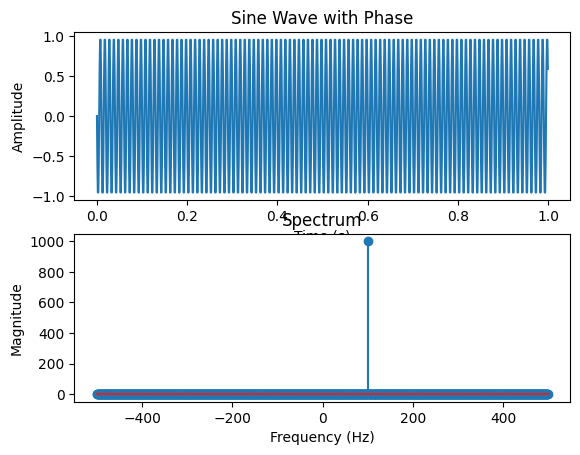

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
fs = 1000 # 取樣頻率
f = 100 # 弦波頻率
duration = 1 # 持續時間
t = np.arange(0, duration, 1/fs) # 時間軸
phase = np.pi/2 # 相位
x = np.exp(1j * (2*np.pi*f*t + phase)) # 帶有相位的弦波信號

# 執行傅立葉變換
X = np.fft.fft(x)

# 繪製頻譜
freq = np.fft.fftfreq(len(X), 1/fs) # 頻率軸
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, x.real)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sine Wave with Phase')

ax[1].stem(freq, np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Spectrum')

plt.show()


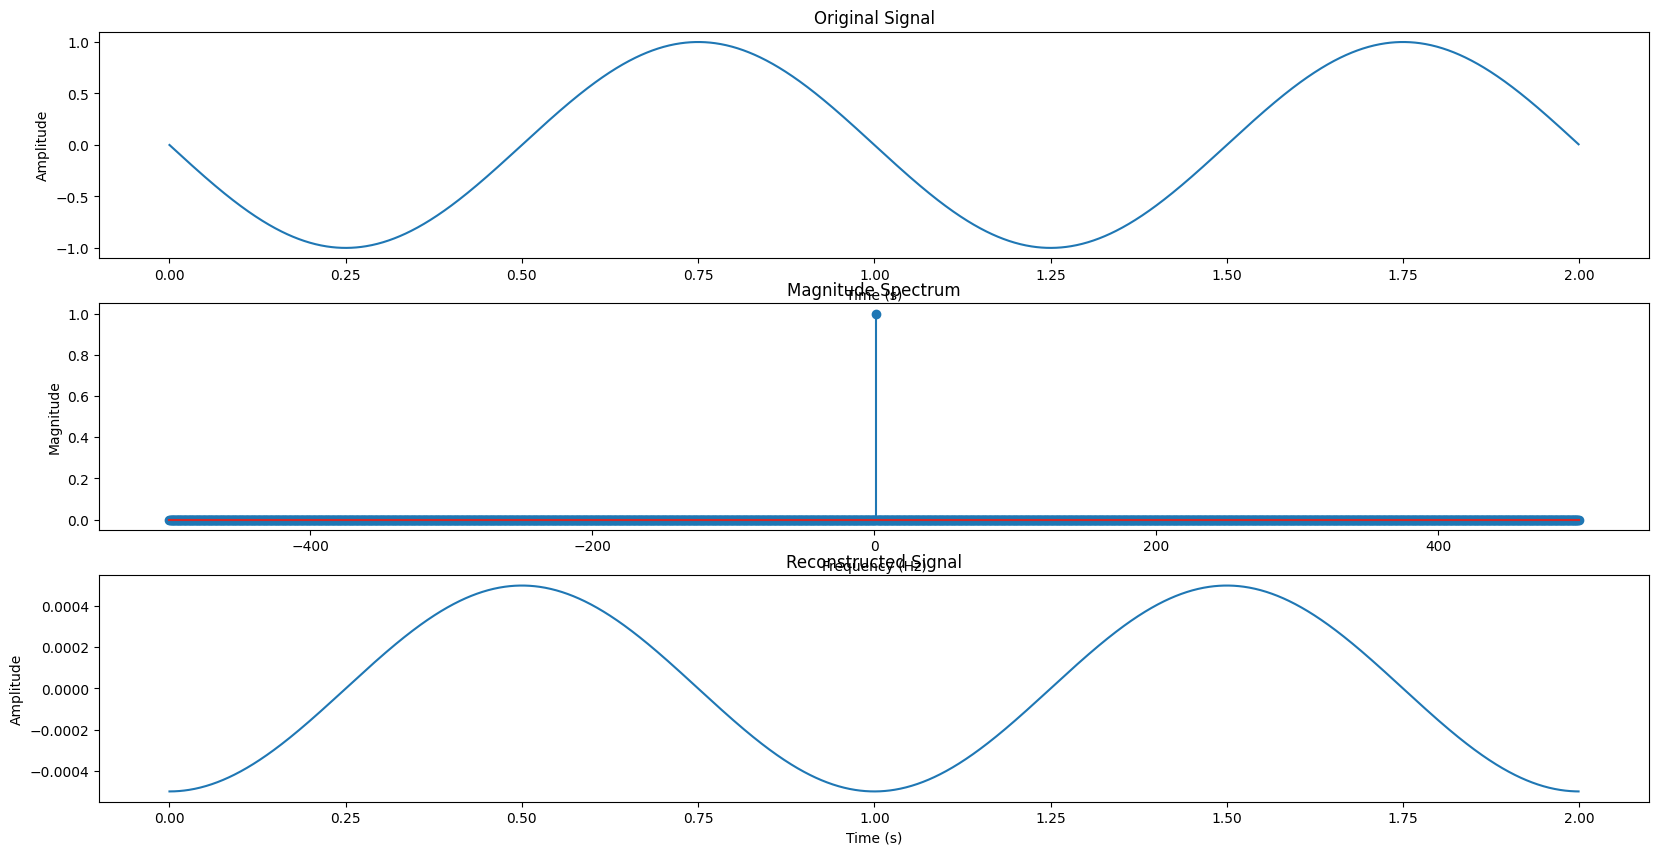

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_analysis(x, fs):
    N = len(x)
    X = np.fft.fft(x) / N
    freq = np.fft.fftfreq(N, 1/fs)
    phase = np.angle(X)
    phase = np.angle(X)
    return X, freq, phase

def reconstruct_signal(X, phase):
    return np.real(np.fft.ifft(X * np.exp(1j * phase)))

# 設定參數
T = 1 # 週期
fs = 1000 # 取樣頻率
f = 1/T # 頻率
duration = 2*T # 持續時間
t = np.arange(0, duration, 1/fs) # 時間軸
phase = np.pi/2 # 相位
x = np.exp(1j * (2*np.pi*f*t + phase)) # 帶有相位的弦波信號

# 執行 DFT
X, freq, phase_spectrum = fourier_analysis(x, fs)

# 重現原始信號
reconstructed_signal = reconstruct_signal(X, phase_spectrum)

# 繪製原始信號和頻譜
fig, ax = plt.subplots(3, 1, figsize=(20, 10))
ax[0].plot(t, x.real)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Original Signal')

ax[1].stem(freq, np.abs(X))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Magnitude Spectrum')

ax[2].plot(t, reconstructed_signal)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Reconstructed Signal')

plt.show()


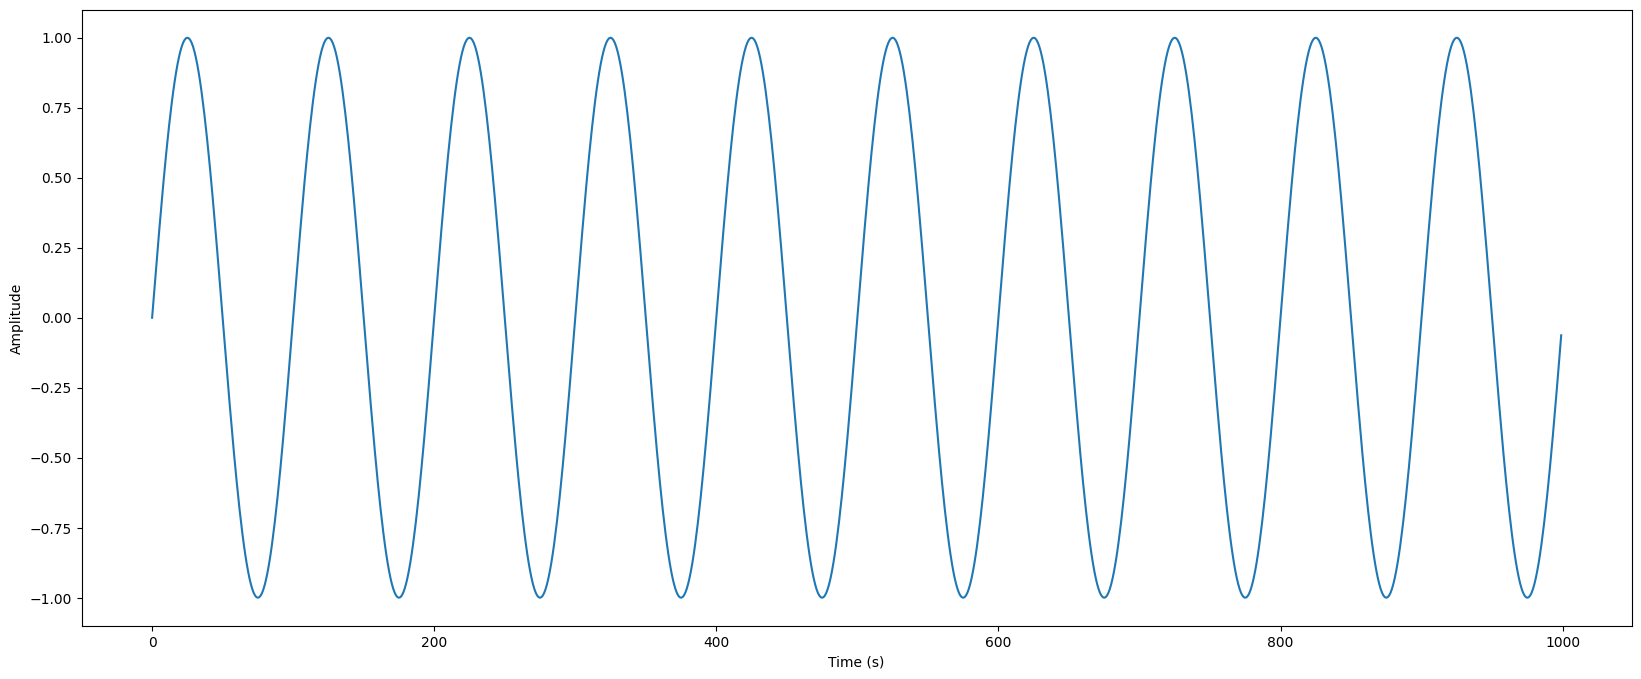

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 設定波形參數
amplitude = 1  # 振幅
frequency = 10  # 頻率
phase = 0      # 相位
duration = 1   # 時間長度，單位為秒
sampling_rate = 1000  # 取樣率，單位為 Hz

# 計算波形數據
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
waveform = amplitude * np.sin(2 * np.pi * frequency * time + phase)

# 繪製波形圖
plt.figure(figsize=(20, 8))
plt.plot(waveform)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [8]:
harmonics = {}

# get data_stock's infomation
data = waveform
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x
# data_notrend = array_data

# Phase correction
data_notrend_phase = np.unwrap(np.angle(np.fft.fft(data_notrend)))

# fft process
data_freqdom = np.fft.fft(data_notrend, n=n_data)
frequence = np.fft.fftfreq(n=n_data, d=1)
f_positive = frequence[np.where(frequence > 0)]
data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# sort indexes
indexes = list(range(f_positive.size))      # frequencies
# sort method 1
# indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# sort method 2 :
# sort indexes by amplitudes, lower -> higher
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# get data_all_time'size
time_transfer = np.arange(0, f_positive.size*2)
count = 0
# get harmonics
for j in indexes:
    # ampli = np.abs(data_freqdom)     # amplitude
    X_abs = np.abs(data_freqdom)
    phase = np.angle(data_freqdom_positive[j]) - data_notrend_phase[j]      # phase correction
    X_complex = X_abs*phase
    harmonics[j] = np.fft.ifft(X_complex).real
    print(data_notrend_phase[j])
    if count < 1:
        count+=1
        print(j)
    else:
        break


4.712196890098601
10
0.0


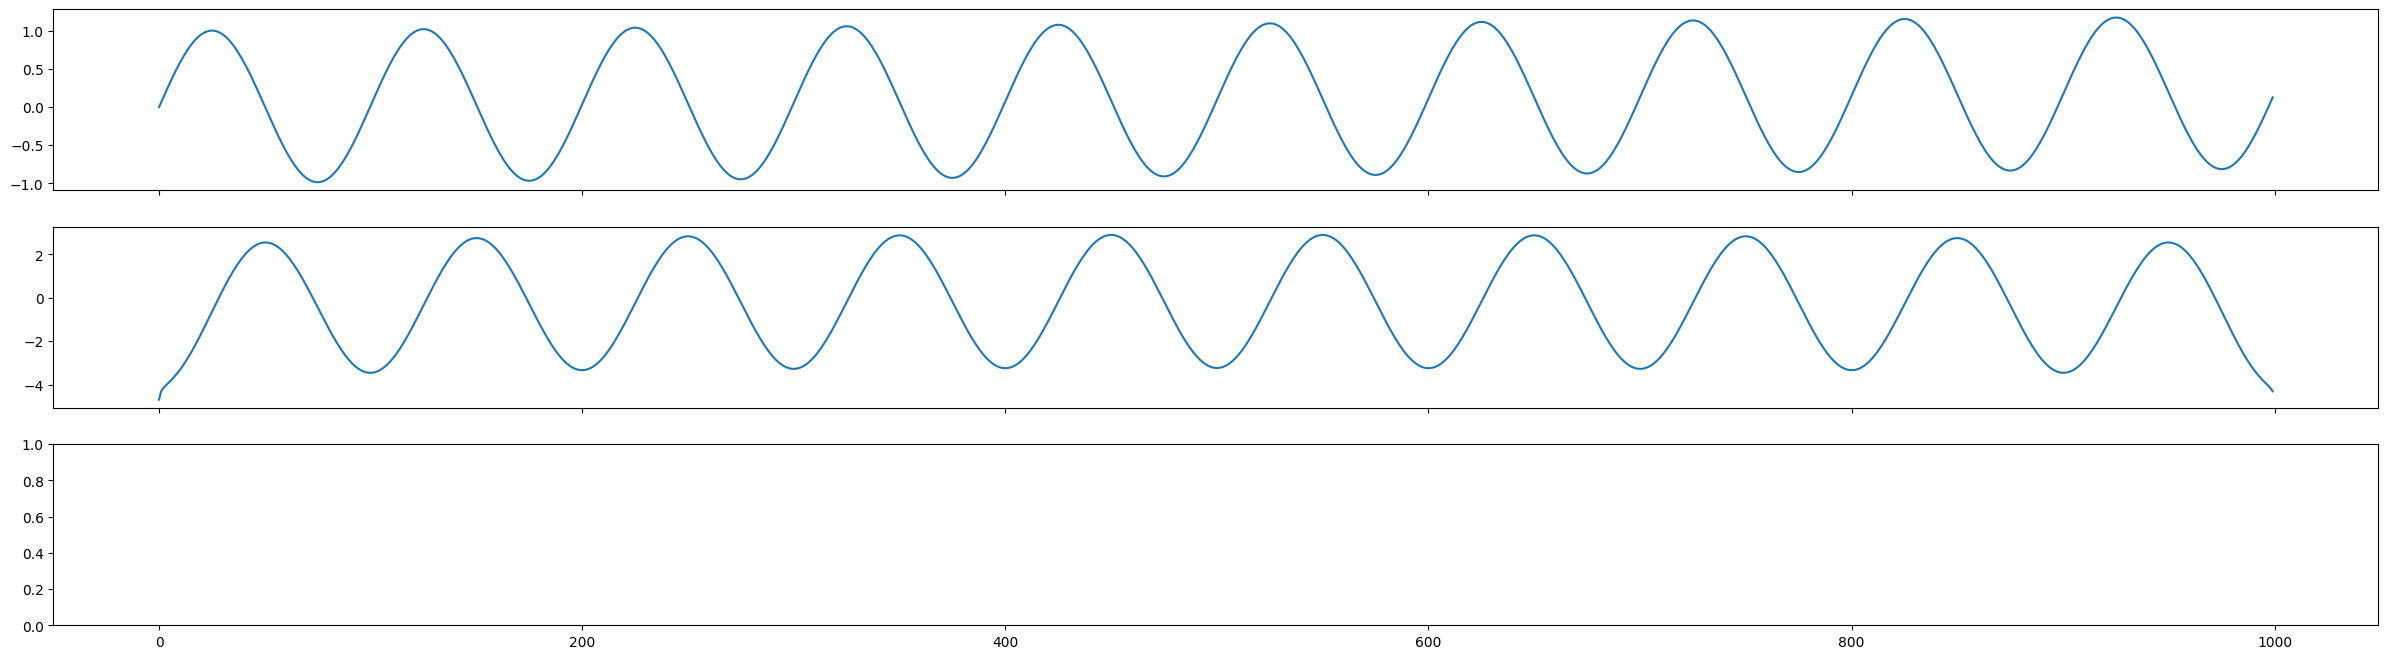

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(30, 8), sharex=True)
axes[0].plot(data_notrend)
axes[1].plot(harmonics[10])
axes[2].plot(1/data_freqdom)
# axes[2].set_xlim(0, 100)

In [41]:

# get data_stock's infomation
data = input_siganl(t, sample_rate)
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x

# Phase correction
data_notrend_phase = np.unwrap(np.angle(np.fft.fft(data_notrend)))

# fft process
data_freqdom = fft.fft(data_notrend, n=n_data)
frequence = fft.fftfreq(n=n_data, d=1)
f_positive = frequence[np.where(frequence > 0)]
data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# sort indexes
indexes = list(range(f_positive.size))      # frequencies
# sort method 1
# indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# sort method 2 :
# sort indexes by amplitudes, lower -> higher
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# get data_all_time'size
time_transfer = np.arange(0, data_range*2)
count = 0
# get harmonics
for j in indexes:
    if count < 5:
        ampli = np.absolute(
            data_freqdom_positive[j]) / n_data     # amplitude
        phase = np.angle(data_freqdom_positive[j]) - data_notrend_phase[j]      # phase correction
        harmonics[j] = ampli * \
            np.cos(2 * np.pi * f_positive[j] * time_transfer + phase)

        print(j)
        count+=1


NameError: name 'input_siganl' is not defined

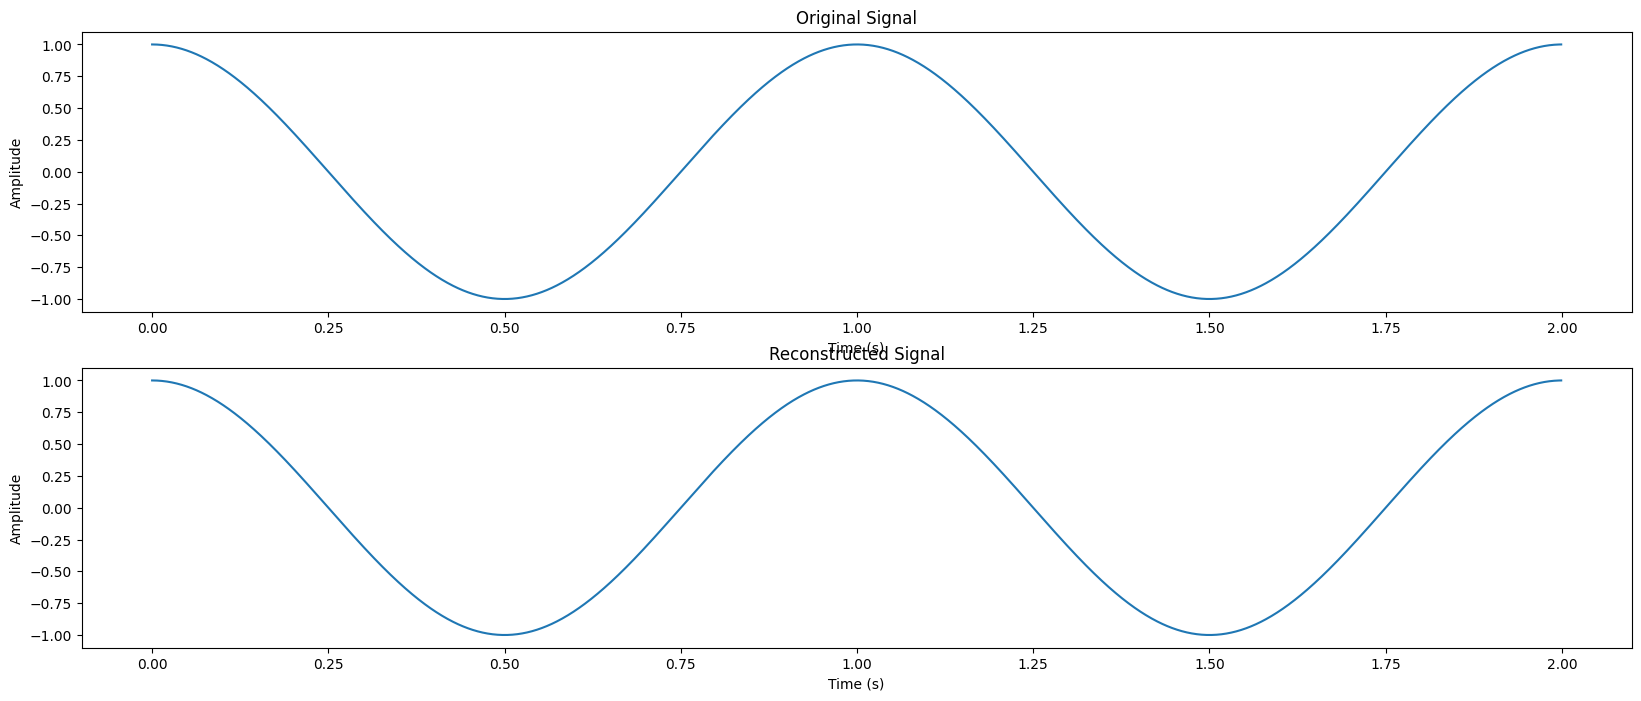

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
T = 1 # 週期
fs = 1000 # 取樣頻率
f = 1/T # 頻率
duration = 2*T # 持續時間
t = np.arange(0, duration, 1/fs) # 時間軸

# 生成原始波
phase = np.pi/2 # 相位
x = np.sin(2*np.pi*f*t + phase) # 帶有相位的弦波信號

# 執行 DFT
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(X), 1/fs) # 頻率軸

# 獲取原始信號的相位
phase_orig = np.angle(X)

# 重建信號
X_abs = np.abs(X) # 複數頻譜的振幅
X_phase = np.exp(1j*phase_orig) # 複數頻譜的相位
X_complex = X_abs*X_phase # 複數頻譜
reconstructed_signal = np.fft.ifft(X_complex).real # 重建信號

# 繪製原始信號和重建信號
fig, ax = plt.subplots(2, 1, figsize=(20, 8))

ax[0].plot(t, x)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Original Signal')

ax[1].plot(t, reconstructed_signal)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Signal')

plt.show()


In [3]:
# 定義複合波函數
def composite_wave(x):
    f = 1  # 基頻
    return np.sin(f * 2 * np.pi * t) + \
           np.sin(3 * f * 2 * np.pi * x) / 2 + \
           np.sin(4 * f * 2 * np.pi * x) / 5 + \
           np.sin(8 * f * 2 * np.pi * x) / 3

# 設定參數
N = 1000  # 取樣數
f_s = 100  # 取樣頻率

# 取樣
t = np.arange(N) / f_s
wave = composite_wave(t)

Amplitude:  0.9999999999999997
Frequency:  10.0
Phase:  -0.0012578949563937236


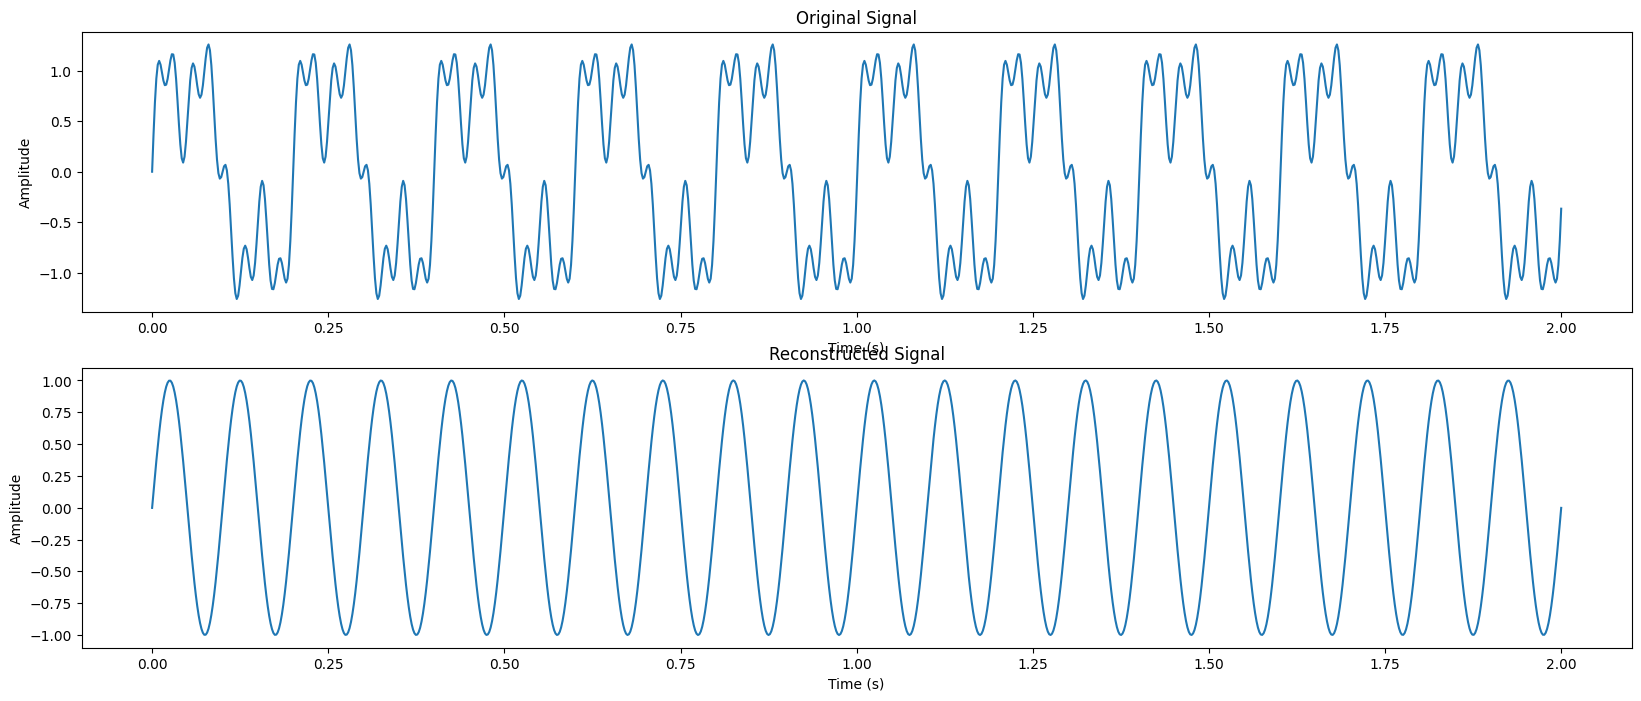

In [5]:
import numpy as np
from scipy.fft import fft

# 創建示例波形
amplitude = 5
frequency = 10
phase = np.pi/4
time = np.linspace(0, 2, 1000)
# waveform = amplitude * np.sin(2 * np.pi * frequency * time + phase)
waveform = wave
# 進行傅立葉變換
spectrum = fft(waveform)

# 找到頻譜中的主要頻率分量
freqs = np.fft.fftfreq(len(waveform))
idx = np.argmax(np.abs(spectrum))
main_freq = freqs[idx]

# 計算波的相位
main_phase = np.angle(spectrum[idx]) - 2 * np.pi * main_freq * time[idx] + np.pi/2

# 計算波的振幅
main_amplitude = np.abs(spectrum[idx]) / len(waveform) * 2

# 計算波的頻率
main_frequency = abs(main_freq * len(time))

reconstructed_signal = main_amplitude * np.sin(2 * np.pi * main_frequency * time + main_phase)

# 輸出結果
print("Amplitude: ", main_amplitude)
print("Frequency: ", main_frequency)
print("Phase: ", main_phase)

# 繪製原始信號和重建信號
fig, ax = plt.subplots(2, 1, figsize=(20, 8))

ax[0].plot(time, waveform)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Original Signal')

ax[1].plot(time, reconstructed_signal)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Signal')

plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# 定義複合波函數
def composite_wave(x):
    f = 1  # 基頻
    return np.sin(f * 2 * np.pi * x) + \
           np.sin(3 * f * 2 * np.pi * x) / 2 + \
           np.sin(4 * f * 2 * np.pi * x) / 5 + \
           np.sin(8 * f * 2 * np.pi * x) / 3

# 設定參數
# N = 1000  # 取樣數
# f_s = 100  # 取樣頻率

# 取樣
# t = np.arange(N) / f_s
# 創建示例波形
time = np.linspace(0, 10, 1000)
waveform = composite_wave(time)

# 進行傅立葉變換
spectrum = fft(waveform)

# 找到頻譜中的主要和次要頻率分量
freqs = np.fft.fftfreq(len(waveform))
idx = np.argsort(np.abs(spectrum))[::-1][:3]
for i in idx:
    main_freq[i] = freqs[i]
# main_freq, second_freq = freqs[idx]
main_phase = []
# 計算波的相位
# main_phase = np.angle(spectrum[idx[0]])
# second_phase = np.angle(spectrum[idx[1]])
for i in idx:
    main_phase[i] = np.angle(spectrum[idx[i]])

# 計算波的振幅
# main_amplitude = np.abs(spectrum[idx[0]]) / len(waveform) * 2
# second_amplitude = np.abs(spectrum[idx[1]]) / len(waveform) * 2
second_amplitude = []
for i in idx:
    second_amplitude[i] = np.abs(spectrum[idx[i]]) / len(waveform) * 2

# 計算波的頻率
# main_frequency = abs(main_freq * len(time))
# second_frequency = abs(second_freq * len(time))

main_frequency = []
for i in idx:
    main_frequency[i] = abs(main_freq * len(time))

for i in idx:
    main_reconstructed_signal = main_amplitude * np.sin(2 * np.pi * main_frequency * time + main_phase)

# main_reconstructed_signal = main_amplitude * np.sin(2 * np.pi * main_frequency * time + main_phase)
# second_reconstructed_signal = second_amplitude * np.sin(2 * np.pi * second_frequency * time + second_phase)
reconstructed_signal = np.zeros_like(main_reconstructed_signal[i])
for i in idx:
    reconstructed_signal += main_reconstructed_signal[i]
# reconstructed_signal = main_reconstructed_signal+second_reconstructed_signal

# # 視覺化
plt.figure(figsize=(20, 8))
plt.plot(time, waveform)
plt.plot(time, main_reconstructed_signal)
# plt.plot(time, second_reconstructed_signal)
plt.plot(time, reconstructed_signal)
plt.title("Example Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

print("Main Amplitude: ", main_amplitude)
print("Main Frequency: ", main_frequency)
print("Main Phase: ", main_phase)
print("Second Amplitude: ", second_amplitude)
print("Second Frequency: ", second_frequency)
print("Second Phase: ", second_phase)


TypeError: 'numpy.float64' object does not support item assignment

In [64]:

# 函數功能：將頻域數據轉換成時序數據
# bins爲頻域數據，n設置使用前多少個頻域數據，loop設置生成數據的長度
def fft_combine(bins, n, loops=1):
    length = int(len(bins) * loops)
    data = np.zeros(length)
    index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
    for k, p in enumerate(bins[:n]):
        if k != 0 : p *= 2 # 除去直流成分之外, 其餘的係數都 * 2
        data += np.real(p) * np.cos(k*index) # 餘弦成分的係數爲實數部分
        data -= np.imag(p) * np.sin(k*index) # 正弦成分的係數爲負的虛數部分
    return index, data
def analyze_fft(dataform1):
    # print('\n ma5: %s ' % (dataform1.columns.values[7]))

    lines = dataform1.shape[0]
    # 生成隨機數
    x = np.random.random(100)
    y = np.fft.fft(x)
    plt.subplot(2, 1, 1)
    # plt.plot(x)
    # plt.plot(dataform1["ma5"])
    plt.xlabel('Time'), plt.ylabel('ma5')

    #dft_a = np.fft.fft(dataform1["ma5"])

    plt.subplot(2, 1, 2)
    """
    plt.plot(dft_a)
    #plt.plot(y)
    plt.xlabel('Freq (Hz)'), plt.ylabel(' ')
    plt.show()"""
    # ts_log = np.log(dataform1["ma5"])
    ts_log = dataform1
    ts_diff = ts_log.diff(1)
    ts_diff = ts_log
    ts_diff = ts_diff.dropna()
    fy = np.fft.fft(ts_diff)
    conv1 = np.real(np.fft.ifft(fy))  # 逆變換
    index, conv2 = fft_combine(fy / len(ts_diff), int(len(fy) / 2 - 1), 1.3)
    ntotal = (len(ts_diff)/10 +2)*10

    plt.plot(ts_diff)
    plt.plot(conv1 - 0.5)
    plt.plot(conv2 - 1)
    plt.xticks(np.arange(1, ntotal, 5))
    plt.grid( )
    plt.show()
    return 0

In [56]:
waveform = composite_wave(time)

AttributeError: 'numpy.ndarray' object has no attribute 'diff'

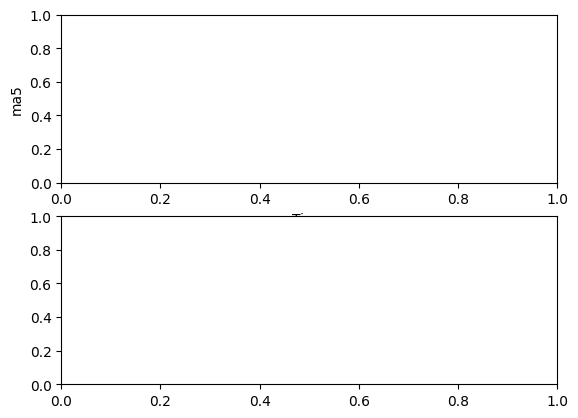

In [65]:
index, data = fft_combine(waveform, 1000, loops=1)
analyze_fft(data)